In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [4]:
data = pd.read_csv("medical_insurance.csv", index_col = 'National Provider Identifier')
data.head()

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,City of the Provider,Zip Code of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
National Provider Identifier,,,,,,,,,,,,,,,,,,,,,
1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,215021854,...,99217,Hospital observation care discharge,N,23.0,23.0,23.0,72.680000,328.000000,54.502609,55.280870
1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,215021854,...,99219,Hospital observation care typically 50 minutes,N,18.0,18.0,18.0,135.850000,614.000000,100.958889,102.348889
1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,215021854,...,99221,"Initial hospital inpatient care, typically 30 ...",N,59.0,58.0,59.0,101.365085,333.288136,79.469661,80.859831
1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,215021854,...,99222,"Initial hospital inpatient care, typically 50 ...",N,132.0,130.0,132.0,139.010455,356.492424,107.933409,107.969621
1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,215021854,...,99223,"Initial hospital inpatient care, typically 70 ...",N,220.0,215.0,220.0,205.185955,631.186364,157.908955,160.930409


In [5]:
display(data.info())
display(data.shape)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9497892 entries, 1003000126 to 1861590176
Data columns (total 25 columns):
Last Name/Organization Name of the Provider                 object
First Name of the Provider                                  object
Middle Initial of the Provider                              object
Credentials of the Provider                                 object
Gender of the Provider                                      object
Entity Type of the Provider                                 object
Street Address 1 of the Provider                            object
Street Address 2 of the Provider                            object
City of the Provider                                        object
Zip Code of the Provider                                    object
State Code of the Provider                                  object
Country Code of the Provider                                object
Provider Type                                               object
Medi

None

(9497892, 25)

In [6]:
data.isnull().sum()

Last Name/Organization Name of the Provider                     145
First Name of the Provider                                   423916
Middle Initial of the Provider                              2630743
Credentials of the Provider                                  637367
Gender of the Provider                                       423842
Entity Type of the Provider                                       1
Street Address 1 of the Provider                                  1
Street Address 2 of the Provider                            5292992
City of the Provider                                              4
Zip Code of the Provider                                          1
State Code of the Provider                                        1
Country Code of the Provider                                      1
Provider Type                                                     1
Medicare Participation Indicator                                  1
Place of Service                                

There are many NaNs in several columns, I will process them later. Let's only focus samples from Californa. 

In [7]:
# subset dataset to only Californa data
data_ca = data.loc[data['State Code of the Provider']=='CA']
display(data_ca.shape)

(731564, 25)

We can see that number of samples are reduced from 9+ millions to 700 thousands. Let's start to dive more into the dataset

In [8]:
data_ca_drop = data_ca.drop(['Middle Initial of the Provider', 'First Name of the Provider','Credentials of the Provider','Street Address 2 of the Provider','State Code of the Provider','Country Code of the Provider'], axis=1)

In [9]:
data_ca_drop.isnull().sum()

Last Name/Organization Name of the Provider                    27
Gender of the Provider                                      40464
Entity Type of the Provider                                     0
Street Address 1 of the Provider                                0
City of the Provider                                            0
Zip Code of the Provider                                        0
Provider Type                                                   0
Medicare Participation Indicator                                0
Place of Service                                                0
HCPCS Code                                                      0
HCPCS Description                                               0
HCPCS Drug Indicator                                            0
Number of Services                                              0
Number of Medicare Beneficiaries                                0
Number of Distinct Medicare Beneficiary/Per Day Services        0
Average Me

So we notice that there are 40464 missing values in Gender, lets' dip more information about the gender column

In [10]:
print (data_ca_drop['Gender of the Provider'].describe())


count     691100
unique         2
top            M
freq      515106
Name: Gender of the Provider, dtype: object


we can see that gender in male acounts for almost 74% of the data. It can be inferred from the fact that generally there are more male physicians (provider) than female physicians. The missing value in column "Last Name/Organization Name of the Provider" and "Gender of the Provider" account for less than 20% of the data, let's ignore the rows that missing with gender first. 

In [11]:
data_ca_drop = data_ca_drop.dropna()
data_ca_drop.isnull().sum()

Last Name/Organization Name of the Provider                 0
Gender of the Provider                                      0
Entity Type of the Provider                                 0
Street Address 1 of the Provider                            0
City of the Provider                                        0
Zip Code of the Provider                                    0
Provider Type                                               0
Medicare Participation Indicator                            0
Place of Service                                            0
HCPCS Code                                                  0
HCPCS Description                                           0
HCPCS Drug Indicator                                        0
Number of Services                                          0
Number of Medicare Beneficiaries                            0
Number of Distinct Medicare Beneficiary/Per Day Services    0
Average Medicare Allowed Amount                             0
Average 

Now we don't have any missing value in the dataframe, let's look at more details in this data. First, let's create a column to show the difference between "Avergae submitted Charged Amount" and "Average Medicare Allowed Amount"

In [12]:
data_ca_drop['Average Medicare Difference'] = data_ca_drop['Average Submitted Charge Amount']- data_ca_drop['Average Medicare Allowed Amount'] 

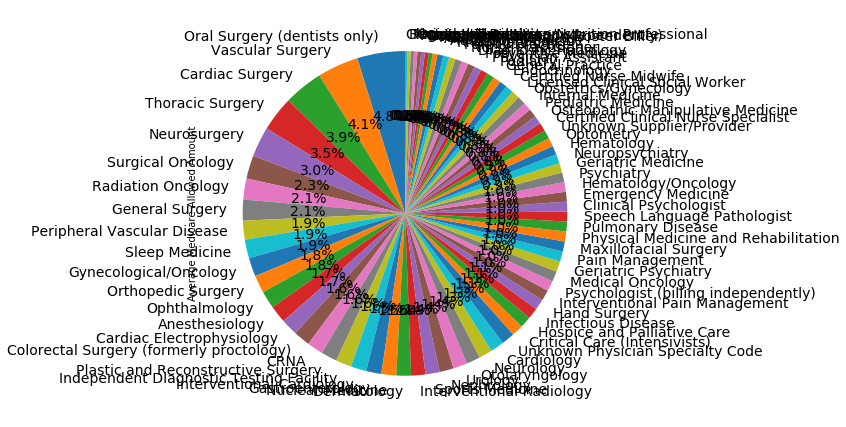

In [13]:
data_pt_amaa = data_ca_drop.groupby('Provider Type')['Average Medicare Allowed Amount'].mean().reset_index().sort_values('Average Medicare Allowed Amount', ascending = False)
plt.figure(figsize=(16,8))
# plot pie chart
ax1 = plt.subplot(121, aspect='equal')
data_pt_amaa.plot(kind='pie', y = 'Average Medicare Allowed Amount', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=data_pt_amaa['Provider Type'], legend = False, fontsize=14)
plt.show()

Based on the pie chart, there are many provider types, let's focus on the provider types that exceed 3%

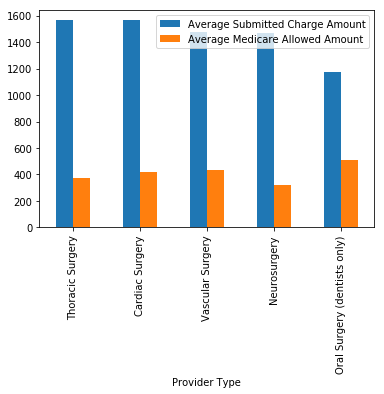

In [35]:
provider_list = ['Oral Surgery (dentists only)','Vascular Surgery','Cardiac Surgery', 'Thoracic Surgery', 'Neurosurgery']
data_ca_drop = data_ca_drop.loc[data_ca_drop['Provider Type'].isin(provider_list)]

# group by provider type and plot bar plot
data_ca_drop.groupby('Provider Type')['Average Submitted Charge Amount','Average Medicare Allowed Amount'].mean().sort_values(by = 'Average Submitted Charge Amount', ascending = False).plot(kind = 'bar')



In [40]:
#subset dataframe based on provider type
data_oral = data_ca_drop.loc[data_ca_drop['Provider Type']=='Oral Surgery (dentists only)']
data_vas = data_ca_drop.loc[data_ca_drop['Provider Type']=='Vascular Surgery']
data_cardiac = data_ca_drop.loc[data_ca_drop['Provider Type']=='Cardiac Surgery']
data_thora = data_ca_drop.loc[data_ca_drop['Provider Type']=='Thoracic Surgery']
data_neuro = data_ca_drop.loc[data_ca_drop['Provider Type']=='Neurosurgery']

Let's see the top 10 procedures in oral surgery that has most difference in average submitted charge amount and allowed amount in California State

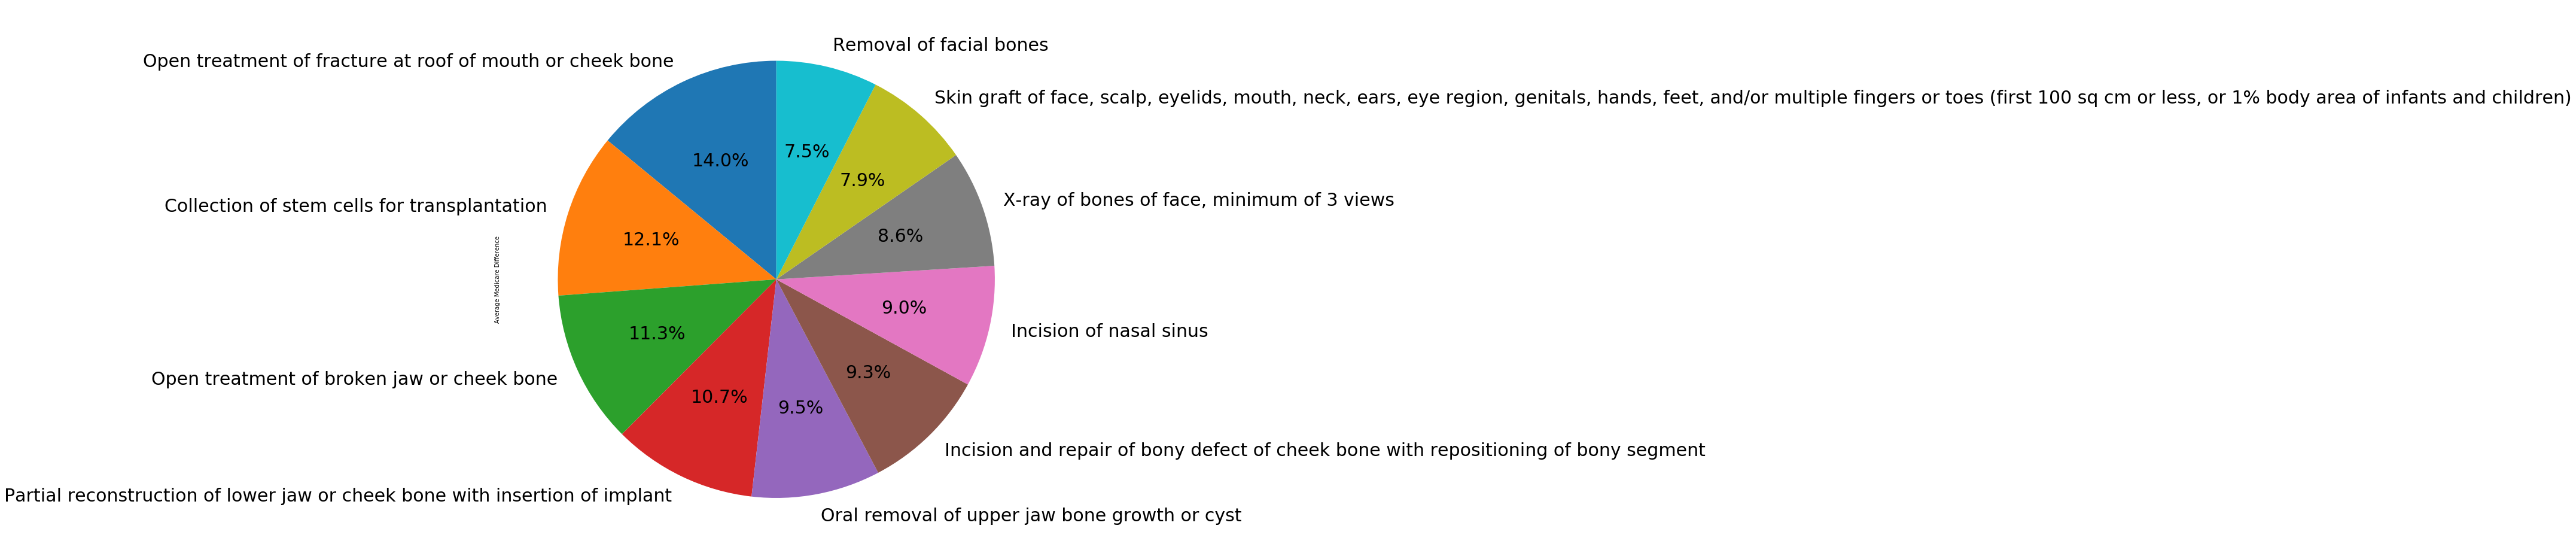

In [64]:
group_oral = data_oral.groupby('HCPCS Description')['Average Medicare Difference'].mean().reset_index().sort_values('Average Medicare Difference', ascending = False).head(10)
plt.figure(figsize=(36,24))
ax = plt.subplot(121, aspect='equal')
group_oral.plot(kind='pie', y = 'Average Medicare Difference', ax = ax, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=group_oral['HCPCS Description'], legend = False, fontsize=30)
plt.show()

Let's see the top 10 procedures in vascular surgery that has most difference in average submitted charge amount and allowed amount in California State

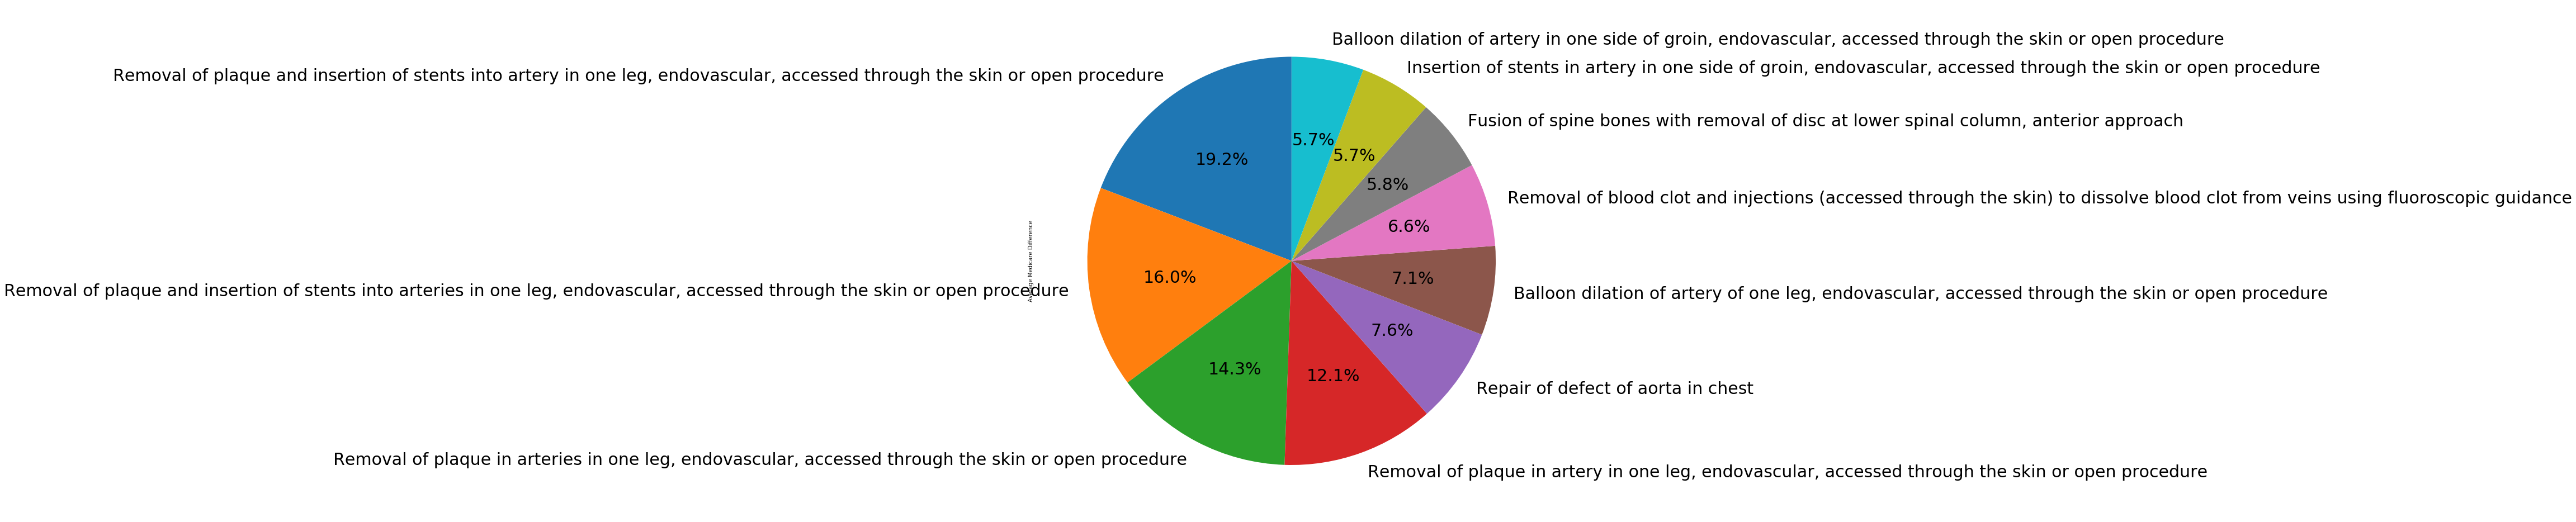

In [65]:
group_vas = data_vas.groupby('HCPCS Description')['Average Medicare Difference'].mean().reset_index().sort_values('Average Medicare Difference', ascending = False).head(10)
plt.figure(figsize=(36,24))

# plot pie chart
ax = plt.subplot(121, aspect='equal')
group_vas.plot(kind='pie', y = 'Average Medicare Difference', ax = ax, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=group_vas['HCPCS Description'], legend = False, fontsize=30)
plt.show()

Let's see the top 10 procedures in cardiac surgery that has most difference in average submitted charge amount and allowed amount in California State

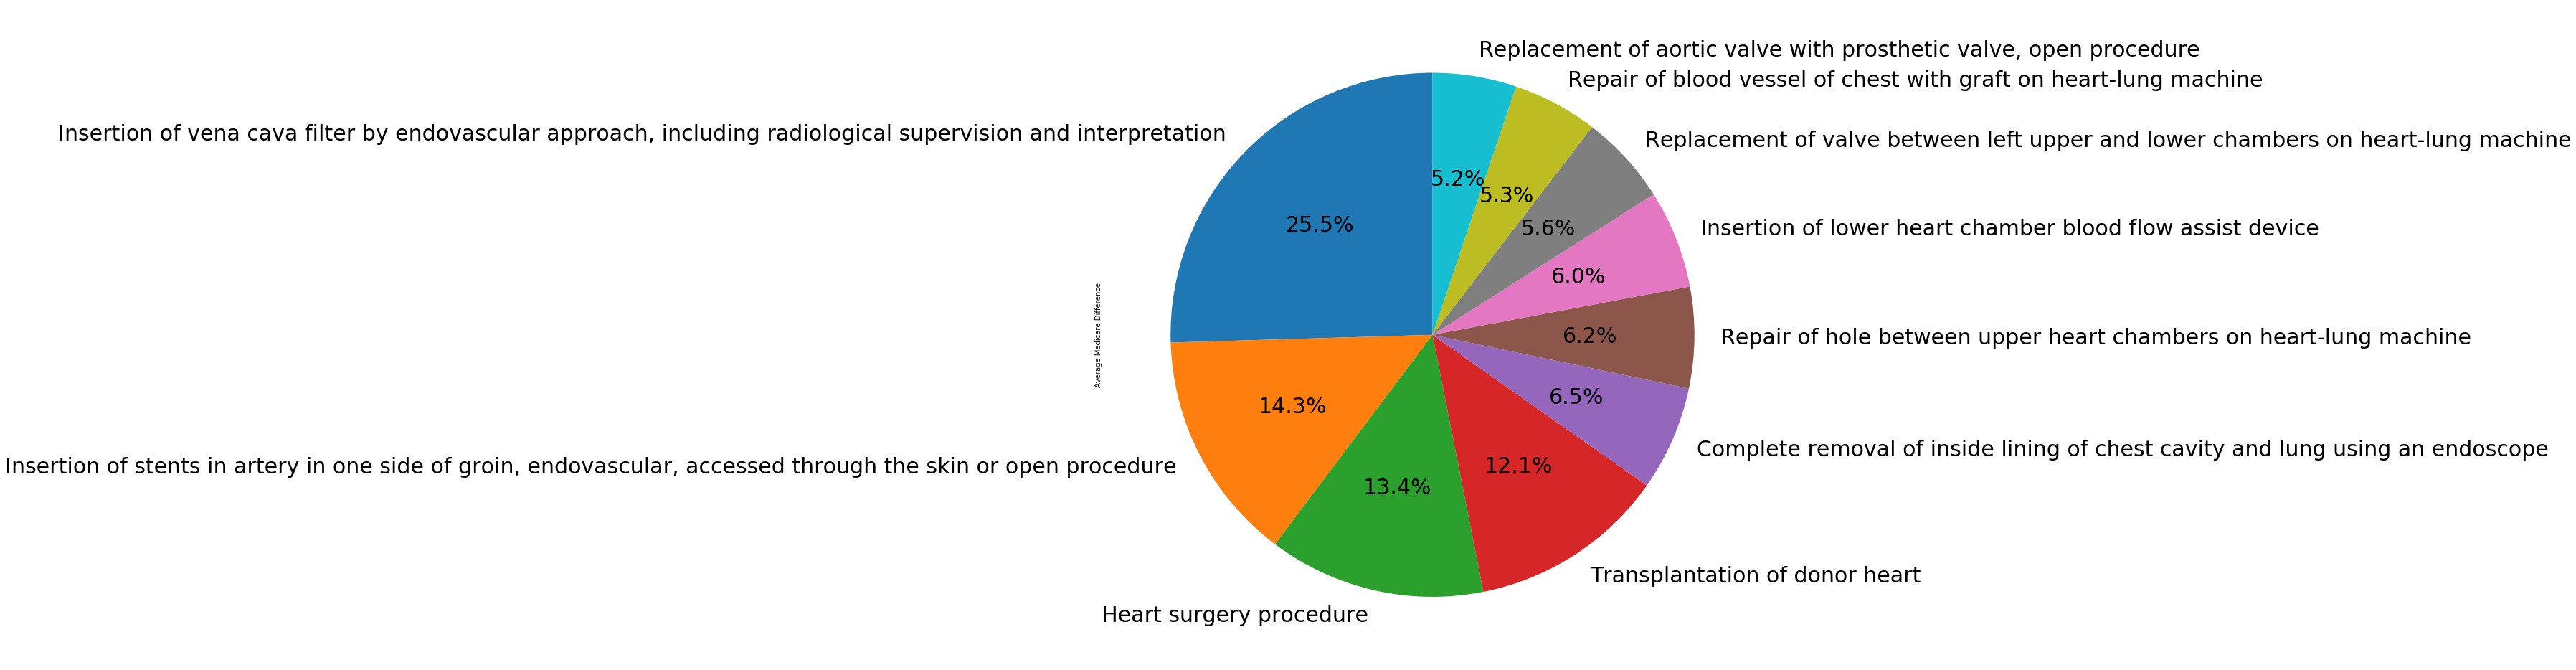

In [66]:
group_cardiac = data_cardiac.groupby('HCPCS Description')['Average Medicare Difference'].mean().reset_index().sort_values('Average Medicare Difference', ascending = False).head(10)
plt.figure(figsize=(36,24))

# plot pie chart
ax = plt.subplot(121, aspect='equal')
group_cardiac.plot(kind='pie', y = 'Average Medicare Difference', ax = ax, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=group_cardiac['HCPCS Description'], legend = False, fontsize=30)
plt.show()

Let's see the top 10 procedures in thoracic surgery that has most difference in average submitted charge amount and allowed amount in California State

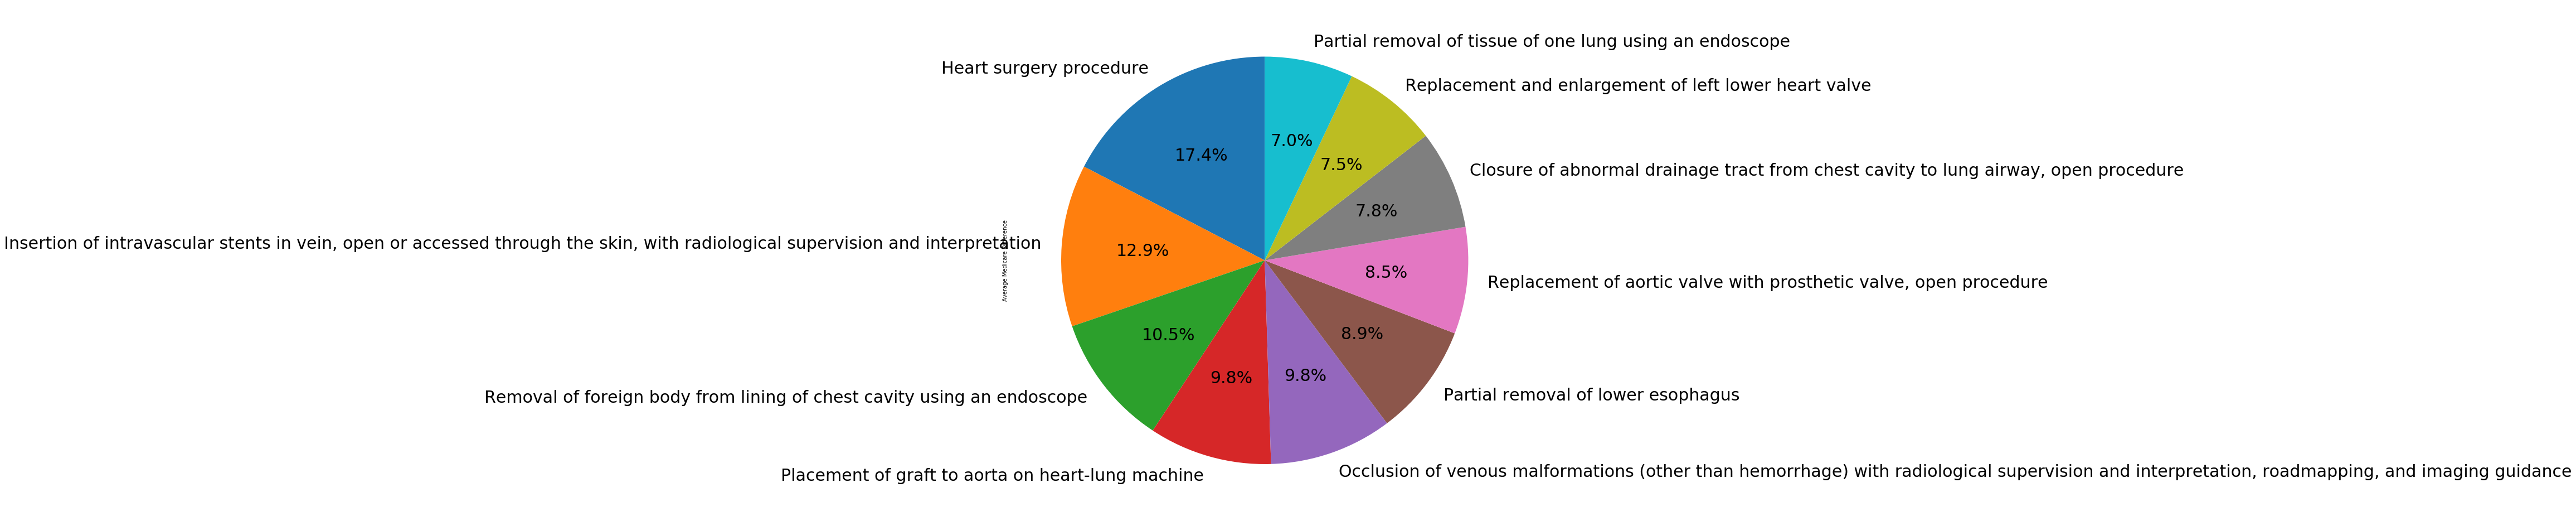

In [67]:
group_thora = data_thora.groupby('HCPCS Description')['Average Medicare Difference'].mean().reset_index().sort_values('Average Medicare Difference', ascending = False).head(10)
plt.figure(figsize=(36,24))

# plot pie chart
ax = plt.subplot(121, aspect='equal')
group_thora.plot(kind='pie', y = 'Average Medicare Difference', ax = ax, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=group_thora['HCPCS Description'], legend = False, fontsize=30)
plt.show()

Let's see the top 10 procedures in neurosurgery that has most difference in average submitted charge amount and allowed amount in California State

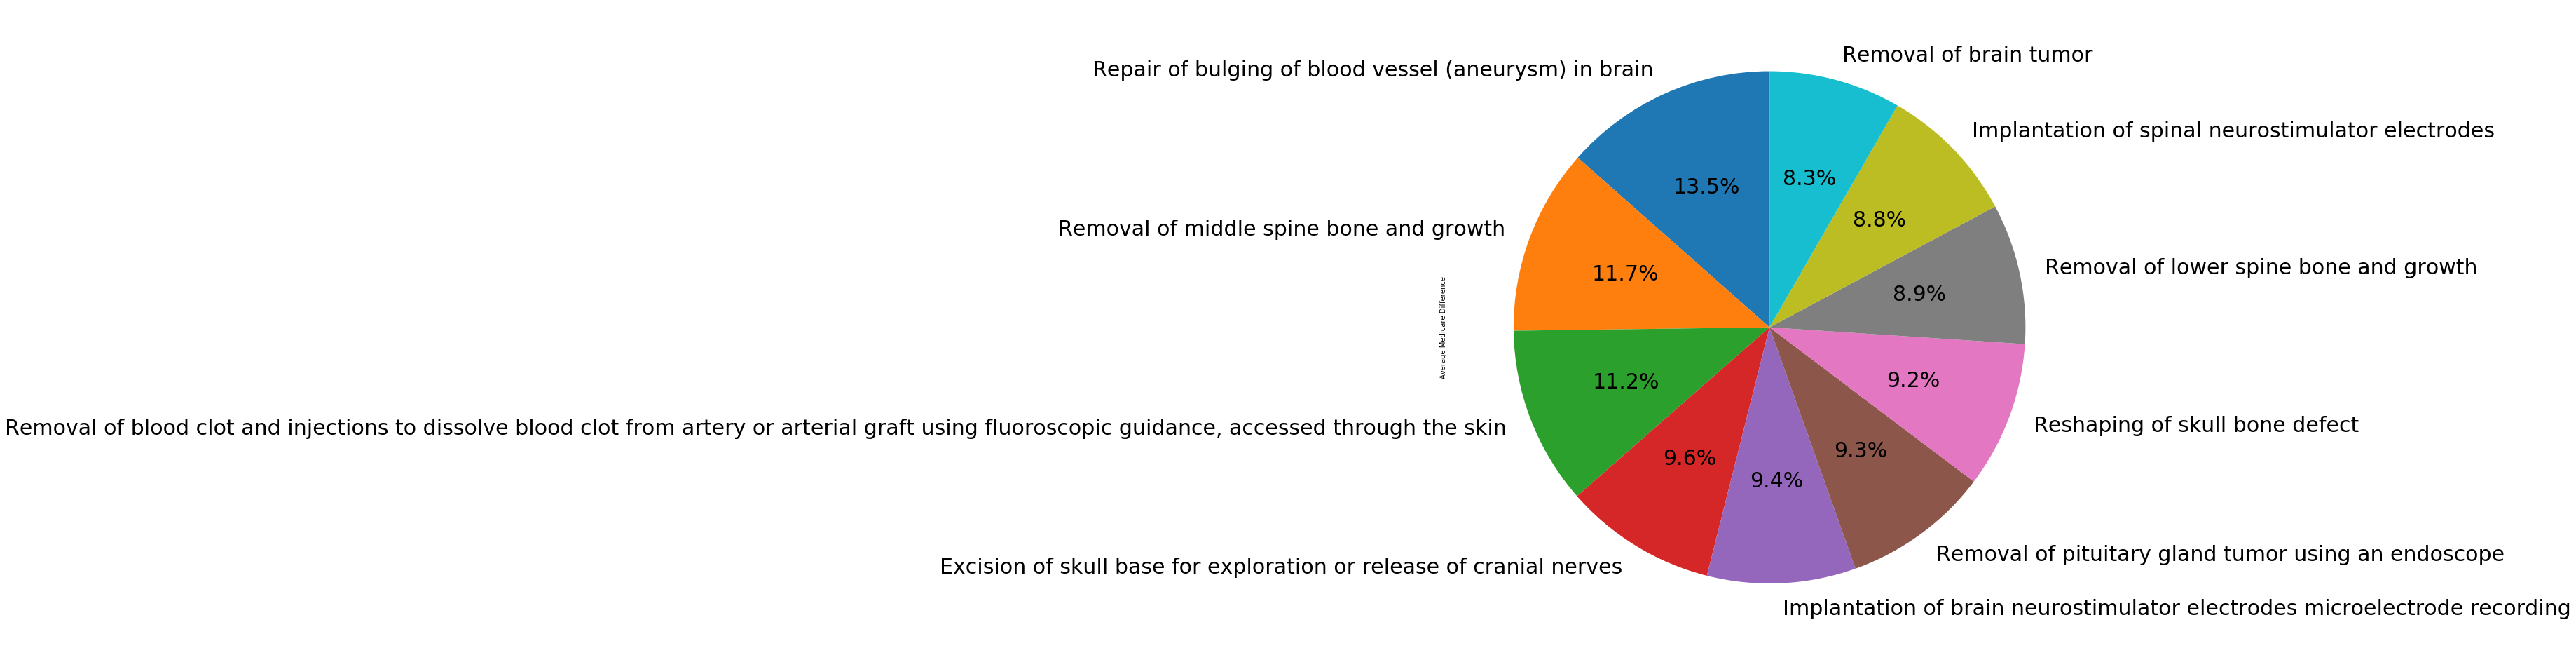

In [68]:
group_neuro = data_neuro.groupby('HCPCS Description')['Average Medicare Difference'].mean().reset_index().sort_values('Average Medicare Difference', ascending = False).head(10)
plt.figure(figsize=(36,24))

# plot pie chart
ax = plt.subplot(121, aspect='equal')
group_neuro.plot(kind='pie', y = 'Average Medicare Difference', ax = ax, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=group_neuro['HCPCS Description'], legend = False, fontsize=30)
plt.show()

Now, I want to know that what factors would affect the average submitted charge amount. To do so, I need to get dummies for each categorical value. 

In [69]:
data_ca_drop_dummy = pd.get_dummies(data_ca_drop[['Zip Code of the Provider','Entity Type of the Provider','Provider Type','Medicare Participation Indicator','Place of Service','HCPCS Code','HCPCS Drug Indicator','City of the Provider']])

In [72]:
from sklearn.preprocessing import StandardScaler
# run lineaqr regression model
Y = data_ca_drop_dummy['Average Submitted Charge Amount']
X = data_ca_drop_dummy.drop(['Average Submitted Charge Amount'], axis = 1)
#X = StandardScaler().fit_transform(X)

KeyError: 'Average Submitted Charge Amount'

In [96]:
print(data_ca_drop_dummy.columns)

Index(['Zip Code of the Provider_90017', 'Zip Code of the Provider_90027',
       'Zip Code of the Provider_90048', 'Zip Code of the Provider_90067',
       'Zip Code of the Provider_90095', 'Zip Code of the Provider_90210',
       'Zip Code of the Provider_90301', 'Zip Code of the Provider_90720',
       'Zip Code of the Provider_90806', 'Zip Code of the Provider_91010',
       ...
       'City of the Provider_VICTORVILLE', 'City of the Provider_VISALIA',
       'City of the Provider_WALNUT CREEK', 'City of the Provider_WEST COVINA',
       'City of the Provider_WEST HILLS',
       'City of the Provider_WEST HOLLYWOOD',
       'City of the Provider_WESTLAKE VILLAGE',
       'City of the Provider_WESTMINSTER', 'City of the Provider_WHITTIER',
       'City of the Provider_WOODLAND HILLS'],
      dtype='object', length=2020)


In [95]:
import statsmodels.formula.api as sm
Y = data_ca_drop_dummy.loc[:,'Average Submitted Charge Amount'].values
X = data_ca_drop_dummy.loc[:, data_ca_drop.columns != 'Average Submitted Charge Amount']

print (type(X))
model = sm.OLS(endog = Y, exog = X.astype(float))
#model = sm.ols(formula = "Average Submitted Charge Amount ~ Last Name/Organization Name of the Provider+Entity Type of the Provider+City of the Provider+Zip Code of the Provider+Provider Type+Medicare Participation Indicator+Place of Service+HCPCS Description+HCPCS Drug Indicator+Number of Services+Number of Medicare Beneficiaries+Number of Distinct Medicare Beneficiary/Per Day Services+Average Medicare Allowed Amount", data = data_ca_drop)
results = model.fit()
print (results.summary())

KeyError: 'the label [Average Submitted Charge Amount] is not in the [columns]'